# Boxplots 
**Use Case:** \
detecting outliers for numerical data \
\
**Code Logic:** \
You can adjust the config to use `iqr` or `zscore` boxplots \
You can choose which columns to generate (leave columns empty to generate for all numerical columns) \
You can adjust the fig size 

**Actionable Next Steps:** \
Removing Outliers 

In [156]:
from scipy.stats import zscore
from scipy.stats import iqr
import matplotlib.pyplot as plt
import numpy as np

def plot_boxplots(df, config):
    method = config.get('method', 'zscore')
    columns = config.get('columns', None)
    figsize_multiplier = config.get('figsize_multiplier', 3)

    if columns is None:
        df_numeric = df.select_dtypes(include=['float64', 'int64'])
    else:
        df_numeric = df[columns]

    if method == 'zscore':
        df_numeric = df_numeric.apply(zscore)
    elif method == 'iqr':
        Q1 = df_numeric.quantile(0.25)
        Q3 = df_numeric.quantile(0.75)
        IQR = Q3 - Q1
        df_numeric = (df_numeric - Q1) / IQR

    n = len(df_numeric.columns)
    ncols = int(np.ceil(np.sqrt(n)))
    nrows = int(np.ceil(n / ncols))

    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*figsize_multiplier, nrows*figsize_multiplier))

    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])

    axes = axes.ravel()

    for i, column in enumerate(df_numeric):
        df_numeric.boxplot(column, ax=axes[i])

    if n < nrows*ncols:
        for j in range(i+1, nrows*ncols):
            fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

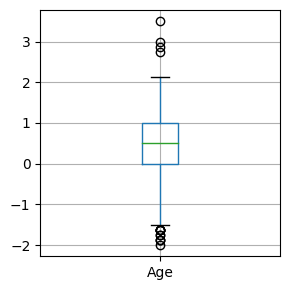

In [157]:
config = {
    'method': #'zscore',
    'iqr',
    'columns': ['Age'],
    'figsize_multiplier': 3
}
plot_boxplots(data2, config)

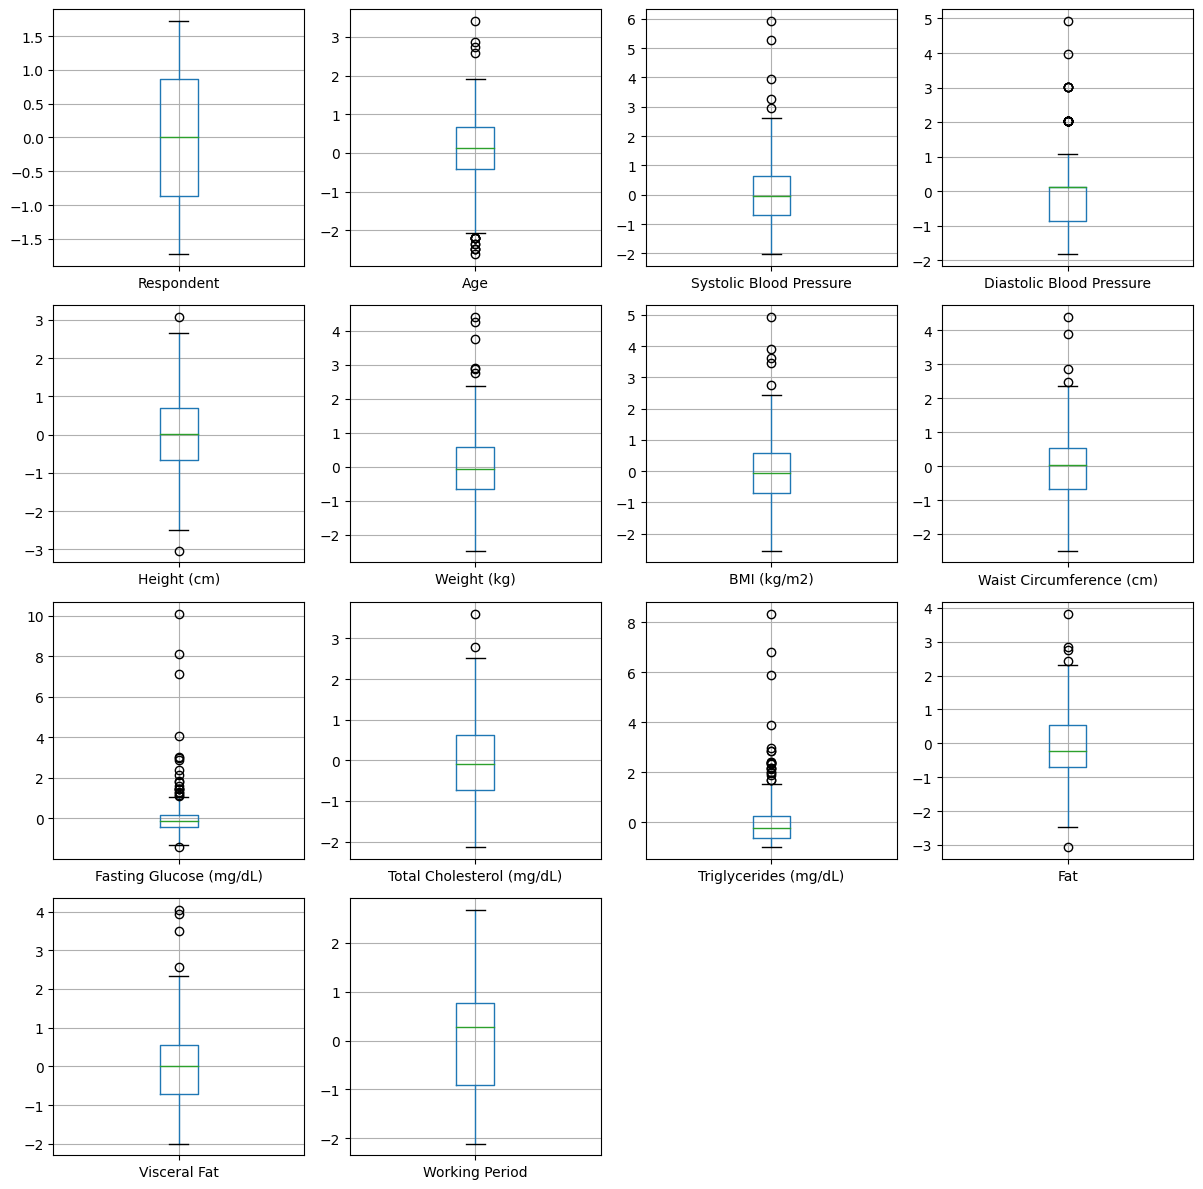

In [158]:
config = {
    'method': 'zscore',
    #'iqr',
    'figsize_multiplier': 3
}
plot_boxplots(df, config)